# For viewing the classification metrics and creating plots

# TODO: cell 30 data aggregation...

In [17]:
# imports
import pandas as pd
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# display options
pd.options.display.max_columns = 60

In [2]:
# data_pth='/mnt/g/Planet/project_data/classification_stats_x4_400000_global_valid_mod.csv'
# data_pth='/mnt/g/Planet/project_data/classification_stats_x4_400000_shield2_hold_mod_first2k.csv'
# data_pth='/mnt/g/Planet/project_data/classification_stats_x10_local-masked_400000_tmp_1k.csv'
# data_pth='/home/ethan_kyzivat/code/pixel-smasher/classification_stats_x10_local-masked_400000_save.csv'
data_pth='/home/ethan_kyzivat/code/pixel-smasher/classification_stats_x10_local-masked_400000_OA_OA_p.csv'

plots_dir='/data_dir/other/figs'
data=pd.read_csv(data_pth)
del data['Unnamed: 0']
data.head()

,num,name,thresh,res,percent_water,mean_ndwi,median_ndwi,accuracy,accuracy_p,kappa,kappa_p,min_ndwi,max_ndwi
0,0,20170710_181144_1034_3B_AnalyticMS_SR_s0235,0.0,SR,8.512153,201.99965,215.0,0.997101,0.671296,0.981379,0.223808,3.0,255.0
1,0,20170710_181144_1034_3B_AnalyticMS_SR_s0235,0.0,HR,8.506076,207.88528,222.0,NaN,NaN,NaN,NaN,12.0,255.0
2,0,20170710_181144_1034_3B_AnalyticMS_SR_s0235,0.0,LR,8.637153,207.84766,222.0,NaN,NaN,NaN,NaN,18.0,255.0
3,0,20170710_181144_1034_3B_AnalyticMS_SR_s0235,0.0,Bic,8.746528,207.83630,222.0,0.995174,0.328704,0.969385,-0.164399,8.0,255.0
4,1,20170708_181118_102a_3B_AnalyticMS_SR_s0175,0.0,SR,16.425347,203.24974,232.0,0.992873,0.602622,0.974029,0.205630,17.0,255.0


## Now, filter data by image and/or resolution

In [3]:
# filter to verifiy number of images
data[['num','res','thresh','kappa']].head()
print(f'Number of images: {data.num.unique().size}')

SyntaxError: invalid syntax (<ipython-input-3-1dd8e1a7af32>, line 3)

In [4]:
## Set kappa prime values that are negative to zero to avoid biasing the averaging!
# Avoiding chaining errors (here: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)
# data_c=data.copy()
''' 
Don't do:
data['kappa_p2']=np.max(data['kappa_p'], data.thresh)
data['kappa_p'][data.iloc[:,[8]]<0]=0
data['kappa_p'][data['kappa_p']<0]=0
'''

###### uncomment to use
# zmask=data['kappa_p']<0
# zmask
# data.loc[zmask, 'kappa_p']=0
# data.head(30)

" \nDon't do:\ndata['kappa_p2']=np.max(data['kappa_p'], data.thresh)\ndata['kappa_p'][data.iloc[:,[8]]<0]=0\ndata['kappa_p'][data['kappa_p']<0]=0\n"

In [5]:
display(data.shape)
data.describe()

(8520, 13)

,num,thresh,percent_water,mean_ndwi,median_ndwi,accuracy,accuracy_p,kappa,kappa_p,min_ndwi,max_ndwi
count,8520.000000,8520.0,8520.000000,8520.000000,8520.00000,4260.000000,4254.000000,4254.000000,4254.000000,8520.000000,8520.000000
mean,1064.500000,0.0,25.422344,179.488347,197.87770,0.991116,0.500000,0.963203,0.007241,17.591197,254.094718
std,614.914056,0.0,21.282928,44.878384,65.19073,0.020300,0.123734,0.056458,0.160200,13.534430,13.120356
min,0.000000,0.0,0.000000,6.350768,1.00000,0.559457,0.000217,0.005591,-0.746525,0.000000,27.000000
25%,532.000000,0.0,10.633681,164.147423,205.00000,0.990342,0.419093,0.962379,-0.105164,8.000000,255.000000
50%,1064.500000,0.0,18.426649,193.678285,223.00000,0.993281,0.500000,0.974627,0.000000,16.000000,255.000000
75%,1597.000000,0.0,32.987739,209.177797,233.00000,0.995382,0.580907,0.982472,0.119380,25.000000,255.000000
max,2129.000000,0.0,99.878906,240.552080,255.00000,1.000000,0.999783,0.996135,0.833572,193.000000,255.000000


In [6]:
# data.to_csv('tmp.csv')

# Pivot (not Crosstab)

In [7]:
ct=data.pivot(index='num',columns='res')
del ct['thresh']
ct.drop(labels=([('name', 'SR'), ('name','LR'), ('name','Bic')]), axis=1, inplace=True)
ct[:10]
# foo= (ct.name[j] for j in ['LR', 'SR','Bic'])

name percent_water             \
res                                           HR           Bic         HR   
num                                                                         
0    20170710_181144_1034_3B_AnalyticMS_SR_s0235      8.746528   8.506076   
1    20170708_181118_102a_3B_AnalyticMS_SR_s0175     16.420139  16.404514   
2    20170709_180724_1030_3B_AnalyticMS_SR_s0260     13.749566  13.887587   
3    20170710_181144_1034_3B_AnalyticMS_SR_s0274      5.046441   4.648438   
4    20170709_180654_1030_3B_AnalyticMS_SR_s0295     60.030816  60.802517   
5    20170707_181137_1035_3B_AnalyticMS_SR_s0008     91.024740  91.139323   
6    20170709_180523_1005_3B_AnalyticMS_SR_s0304     21.058160  20.802083   
7    20170709_180724_1030_3B_AnalyticMS_SR_s0027      7.805990   7.867622   
8    20170710_181144_1034_3B_AnalyticMS_SR_s0198     14.827691  14.648438   
9    20170707_181137_1035_3B_AnalyticMS_SR_s0065     21.159722  20.144097   

                            mean_ndwi                                     \
res         LR         SR         Bic         HR          LR          SR   
num                                                                        
0     8.637153   8.512153  207.836300  207.88528  207.847660  201.999650   
1    16.145833  16.425347  204.883560  204.96246  204.901920  203.249740   
2    13.975694  14.009983  203.448300  203.53676  203.467010  199.456940   
3     4.991319   4.594184  226.803300  226.93260  226.828550  227.110300   
4    60.156250  60.929687  103.232506  103.32800  103.271270  102.739555   
5    91.145833  91.229601   23.986416   24.00705   23.998264   23.113993   
6    20.963542  20.583767  193.706700  193.75851  193.723950  191.130020   
7     7.682292   8.030816  228.520250  228.69539  228.568570  227.496370   
8    14.670139  14.779948  220.205690  220.36166  220.239580  220.065320   
9    20.659722  19.331597  194.903730  194.93831  194.904510  196.120120   

    median_ndwi                       accuracy                   accuracy_p  \
res         Bic     HR     LR     SR       Bic  HR  LR        SR        Bic   
num                                                                           
0         222.0  222.0  222.0  215.0  0.995174 NaN NaN  0.997101   0.328704   
1         233.0  234.0  233.5  232.0  0.990903 NaN NaN  0.992873   0.397378   
2         224.0  223.0  224.0  219.0  0.992578 NaN NaN  0.994983   0.359960   
3         237.0  240.0  238.0  241.0  0.994240 NaN NaN  0.997383   0.227820   
4          27.0   25.0   24.0   27.0  0.986146 NaN NaN  0.990664   0.355697   
5           3.0    2.0    3.0    1.0  0.998793 NaN NaN  0.999089   0.428270   
6         229.0  229.0  229.0  225.0  0.992361 NaN NaN  0.993155   0.456031   
7         250.0  255.0  250.0  253.0  0.995990 NaN NaN  0.996128   0.487673   
8         249.0  255.0  249.0  254.0  0.991931 NaN NaN  0.993468   0.416823   
9         223.0  221.0  223.0  225.0  0.977266 NaN NaN  0.967335   0.637632   

                          kappa                     kappa_p                    \
res  HR  LR        SR       Bic  HR  LR        SR       Bic  HR  LR        SR   
num                                                                             
0   NaN NaN  0.671296  0.969385 NaN NaN  0.981379 -0.164399 NaN NaN  0.223808   
1   NaN NaN  0.602622  0.966844 NaN NaN  0.974029 -0.205830 NaN NaN  0.205630   
2   NaN NaN  0.640040  0.968839 NaN NaN  0.979100 -0.313933 NaN NaN  0.298163   
3   NaN NaN  0.772180  0.937571 NaN NaN  0.970312 -0.113914 NaN NaN  0.257399   
4   NaN NaN  0.644303  0.971036 NaN NaN  0.980403 -0.146120 NaN NaN  0.187610   
5   NaN NaN  0.571730  0.992573 NaN NaN  0.994331 -0.004222 NaN NaN  0.005581   
6   NaN NaN  0.543969  0.976921 NaN NaN  0.979146 -0.061417 NaN NaN  0.064565   
7   NaN NaN  0.512327  0.972237 NaN NaN  0.973546 -0.081865 NaN NaN  0.073641   
8   NaN NaN  0.583177  0.967895 NaN NaN  0.973974 -0.154574 NaN NaN  0.157761   
9   NaN NaN  0.362368  0.930643 NaN NaN  0.896915  0.

In [8]:
    # ct.to_csv('Shield_holdout_v2_x10_crosstab.csv')
# print('Saved CT CROSSTAB')

In [9]:
    # save describe
# ct_describe=ct.describe()
# ct_describe.to_csv(os.path.join(plots_dir, 'stats_crosstab_describe.csv'))
# print('Saved CT DESCRIBE')

# Add plots, working from wide format

Text(0, 0.5, 'Count')

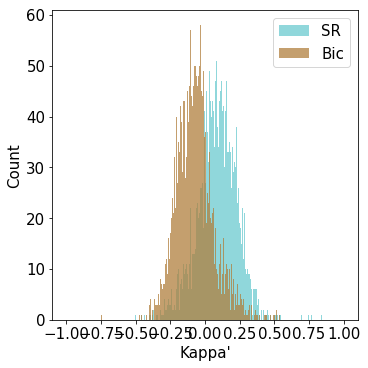

In [25]:
# kappa histograms plot

    # options
fs=15 # font
a=0.75 # alpha
bins=np.linspace(-1,1,300)

    # plot
fig, ax = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
ct.kappa_p.SR.plot.hist(ax=ax,alpha=a, color='#6BCAD0', bins=bins)
ct.kappa_p.Bic.plot.hist(ax=ax,alpha=a, color='#B07F3E', bins=bins)

    # look nice
ax.legend(fontsize=fs)
plt.yticks(fontsize=fs)
plt.xticks(fontsize=fs)
ax.legend(loc="upper right", fontsize=fs)
ax.set_xlabel('Kappa\'', fontsize=fs)
ax.set_ylabel('Count', fontsize=fs)
# fig.savefig(os.path.join(plots_dir, 'plot_hist1.png'), dpi=300)

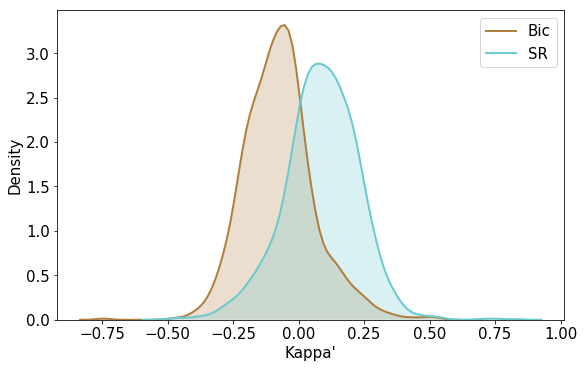

In [60]:
# Density Plot and Histogram # from https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
fig, ax = plt.subplots(1, 1, figsize=(8, 5), constrained_layout=True)
sns.distplot(ct.kappa_p.Bic[~np.isnan(ct.kappa_p.Bic)], hist=False, kde=True, ax=ax, label='Bic',
             bins=int(180/5), color = '#B07F3E', 
             hist_kws={'edgecolor':'#B07F3E'},
             kde_kws={'linewidth': 2, 'shade':'True'})
sns.distplot(ct.kappa_p.SR[~np.isnan(ct.kappa_p.SR)], hist=False, kde=True, ax=ax, label='SR',
             bins=int(180/5), color = '#6BCAD0', 
             hist_kws={'edgecolor':'#6BCAD0'},
             kde_kws={'linewidth': 2, 'shade':'True'})

    # look nice
# ax.legend(fontsize=fs)
plt.legend(prop={'size': 16}, title = 'Airline')
plt.yticks(fontsize=fs)
plt.xticks(fontsize=fs)
ax.legend(loc="upper right", fontsize=fs)
ax.set_xlabel('Kappa\'', fontsize=fs)
ax.set_ylabel('Density', fontsize=fs)

    # save
fig.savefig(os.path.join(plots_dir, 'plot_hist_kappa_p_kde1.png'), dpi=300)

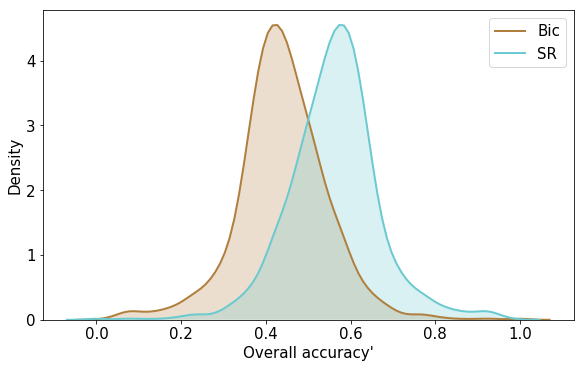

In [61]:
# Density Plot and Histogram # from https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
fig, ax = plt.subplots(1, 1, figsize=(8, 5), constrained_layout=True)
sns.distplot(ct.accuracy_p.Bic[~np.isnan(ct.accuracy_p.Bic)], hist=False, kde=True, ax=ax, label='Bic',
             bins=int(180/5), color = '#B07F3E', 
             hist_kws={'edgecolor':'#B07F3E'},
             kde_kws={'linewidth': 2, 'shade':'True'})
sns.distplot(ct.accuracy_p.SR[~np.isnan(ct.accuracy_p.SR)], hist=False, kde=True, ax=ax, label='SR',
             bins=int(180/5), color = '#6BCAD0', 
             hist_kws={'edgecolor':'#6BCAD0'},
             kde_kws={'linewidth': 2, 'shade':'True'})

    # look nice
# ax.legend(fontsize=fs)
plt.legend(prop={'size': 16}, title = 'Airline')
plt.yticks(fontsize=fs)
plt.xticks(fontsize=fs)
ax.legend(loc="upper right", fontsize=fs)
ax.set_xlabel('Overall accuracy\'', fontsize=fs)
ax.set_ylabel('Density', fontsize=fs)

    # save
fig.savefig(os.path.join(plots_dir, 'plot_hist_OA_p_kde1.png'), dpi=300)

In [24]:
?sns.distplot

In [26]:
?plt.hist

In [10]:
ct.mean()

               res
percent_water  Bic     25.454658
               HR      25.394200
               LR      25.436819
               SR      25.403698
mean_ndwi      Bic    180.057808
               HR     180.133054
               LR     180.075841
               SR     177.686684
median_ndwi    Bic    198.636385
               HR     198.464789
               LR     198.677934
               SR     195.731690
accuracy       Bic      0.990983
               HR            NaN
               LR            NaN
               SR       0.991248
accuracy_p     Bic      0.439133
               HR            NaN
               LR            NaN
               SR       0.560867
kappa          Bic      0.959795
               HR            NaN
               LR            NaN
               SR       0.966612
kappa_p        Bic      0.024954
               HR            NaN
               LR            NaN
               SR       0.110436
min_ndwi       Bic     16.300939
               HR      1

In [10]:
# This works!
# reset index, then unstack https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html

# dataW=data.reset_index(['num','thresh'])
# data.reindex(index=['num','thresh'])
dataW=data.set_index(['thresh', 'res','num',])
del dataW['name']
dataW

percent_water  mean_ndwi  median_ndwi  accuracy  accuracy_p  \
thresh res num                                                                 
0.0    SR  0          8.512153  201.99965        215.0  0.997101    0.671296   
       HR  0          8.506076  207.88528        222.0       NaN         NaN   
       LR  0          8.637153  207.84766        222.0       NaN         NaN   
       Bic 0          8.746528  207.83630        222.0  0.995174    0.328704   
       SR  1         16.425347  203.24974        232.0  0.992873    0.602622   
...                        ...        ...          ...       ...         ...   
       Bic 2128       7.195313  201.14601        208.0  0.990686    0.339216   
       SR  2129      10.691406  203.08470        213.0  0.989362    0.471863   
       HR  2129      10.440104  208.26823        219.0       NaN         NaN   
       LR  2129      10.112847  208.19705        219.0       NaN         NaN   
       Bic 2129      10.233507  208.19495        219.0  0.990061    0.528137   

                    kappa   kappa_p  min_ndwi  max_ndwi  
thresh res num                                           
0.0    SR  0     0.981379  0.223808       3.0     255.0  
       HR  0          NaN       NaN      12.0     255.0  
       LR  0          NaN       NaN      18.0     255.0  
       Bic 0     0.969385  0.000000       8.0     255.0  
       SR  1     0.974029  0.205630      17.0     255.0  
...                   ...       ...       ...       ...  
       Bic 2128  0.927275  0.000000      12.0     255.0  
       SR  2129  0.943712  0.000000      13.0     255.0  
       HR  2129       NaN       NaN      26.0     255.0  
       LR  2129       NaN       NaN      35.0     255.0  
       Bic 2129  0.946381  0.034496      28.0     255.0  

[8520 rows x 9 columns]

In [11]:
# cross-tabulate and looks at summary stats
data.groupby(['res','thresh']).describe()
group1=data[['num', 'res','thresh','percent_water','median_ndwi','accuracy','accuracy_p','kappa', 'kappa_p']].groupby(['res','thresh']).mean()
del group1['num']
group1
# data[['res','thresh','kappa']].groupby(['res']).describe(percentiles=[0.5]) # groupby ,'thresh' as well

,,percent_water,median_ndwi,accuracy,accuracy_p,kappa,kappa_p
res,thresh,,,,,,
Bic,0.0,25.454658,198.636385,0.990983,0.439133,0.959795,0.024954
HR,0.0,25.394200,198.464789,NaN,NaN,NaN,NaN
LR,0.0,25.436819,198.677934,NaN,NaN,NaN,NaN
SR,0.0,25.403698,195.731690,0.991248,0.560867,0.966612,0.110436


In [12]:
dataW1=data.set_index(['res','thresh','num',])
del dataW1['name']
dataW1.count()

percent_water    8520
mean_ndwi        8520
median_ndwi      8520
accuracy         4260
accuracy_p       4254
kappa            4254
kappa_p          4254
min_ndwi         8520
max_ndwi         8520
dtype: int64

In [13]:
# replicate plots from first paper - test
dataW1
group1.RMSE=[np.nan]
group1
# meanSq=metrics.mean_squared_error(dataW1)
dataW1.loc[('HR', 0)].percent_water
print('RMSE', (metrics.mean_squared_error(dataW1.loc[('HR', 0)].percent_water, dataW1.loc[('SR', 0)].percent_water))**0.5)
print('MAE', metrics.mean_absolute_error(dataW1.loc[('HR', 0)].percent_water, dataW1.loc[('SR', 0)].percent_water))

RMSE 1.1290463513908007
MAE 0.2169003896061555


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  


In [14]:
group1.index.levels[1]
group1.loc[('Bic', 0)]
group1['p_water_rmse']=np.nan
group1['p_water_mae']=np.nan
group1['p_water_cov']=np.nan
group1['p_water_mean_dev']=np.nan

In [15]:
# repeat in loop to save data vals for plotting
group1
for i in group1.index.levels[0]: # res
    for j in group1.index.levels[1]: # thresh
#         print(i)
        if i == 'HR':
            group1.loc[(i, j)].p_water_rmse, group1.loc[(i, j)].p_water_mae, group1.loc[(i, j)].p_water_mean_dev, group1.loc[(i, j)].p_water_mean_dev = (np.nan, np.nan, np.nan,np.nan)
        else:
            group1.loc[(i, j)].p_water_rmse=(metrics.mean_squared_error(dataW1.loc[('HR', j)].percent_water, dataW1.loc[(i, j)].percent_water))**0.5
            group1.loc[(i, j)].p_water_mae=metrics.mean_absolute_error(dataW1.loc[('HR', j)].percent_water, dataW1.loc[(i, j)].percent_water)
            group1.loc[(i, j)].p_water_cov=np.cov(pd.DataFrame(data=[dataW1.loc[('HR', j)].percent_water, dataW1.loc[(i, j)].percent_water]))[0,1]
            group1.loc[(i, j)].p_water_mean_dev=group1.loc[('HR', j)].percent_water-group1.loc[(i, j)].percent_water
group1

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  # This is added back by InteractiveShellApp.init_path()


,,percent_water,median_ndwi,accuracy,accuracy_p,kappa,kappa_p,p_water_rmse,p_water_mae,p_water_cov,p_water_mean_dev
res,thresh,,,,,,,,,,
Bic,0.0,25.454658,198.636385,0.990983,0.439133,0.959795,0.024954,1.229084,0.291117,452.895096,-0.060458
HR,0.0,25.394200,198.464789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LR,0.0,25.436819,198.677934,NaN,NaN,NaN,NaN,0.915515,0.299729,452.983165,-0.042620
SR,0.0,25.403698,195.731690,0.991248,0.560867,0.966612,0.110436,1.129046,0.216900,454.678906,-0.009498


Thres: 0.0 
group:



,,percent_water,median_ndwi,accuracy,accuracy_p,kappa,kappa_p,p_water_rmse,p_water_mae,p_water_cov,p_water_mean_dev
res,thresh,,,,,,,,,,
Bic,0.0,25.454658,198.636385,0.990983,0.439133,0.959795,0.024954,1.229084,0.291117,452.895096,-0.060458
HR,0.0,25.394200,198.464789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LR,0.0,25.436819,198.677934,NaN,NaN,NaN,NaN,0.915515,0.299729,452.983165,-0.042620
SR,0.0,25.403698,195.731690,0.991248,0.560867,0.966612,0.110436,1.129046,0.216900,454.678906,-0.009498


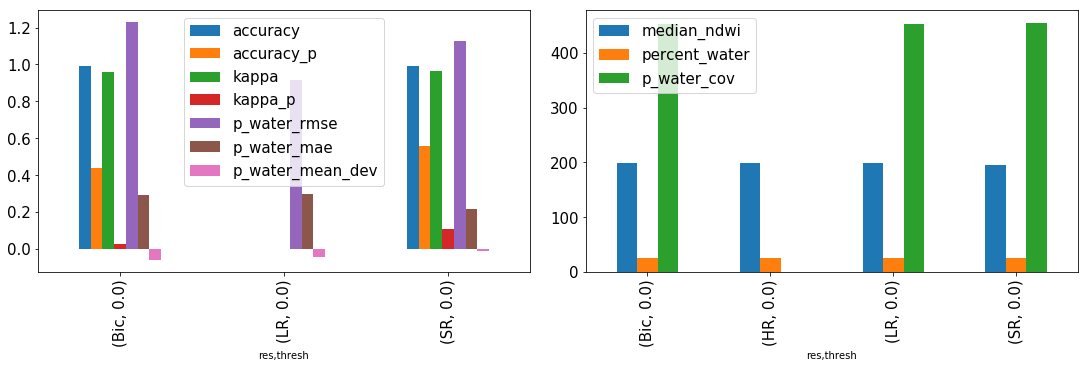

In [17]:
# groupby, then plot (legacy)

group11=group1.groupby(level='thresh', squeeze=True)

    # plot options
fs =15 # font size

# group11 =group1.reset_index()
# group11.groupby(['res', 'thresh']).mean()
# fig, ax = plt.subplots(len(group1.index.levels[0]),1)
k=0 # init
# group11.set_index(['thresh','res'])
for thresh, res in group11:
    print('Thres:', thresh, '\ngroup:\n')
#     print('Res:', res, '\ngroup:\n')
    display(res.head(20))
#     ax[k].bar(res)
#     plt.subplot(len(group1.index.levels[0]),1,k+1)

        # uncomment for various plots:
    fig, axs = plt.subplots(1, 2, figsize=(15, 5), constrained_layout=True)
#     res[['percent_water'	,'median_ndwi'	,'kappa',	'p_water_rmse',	'p_water_mae',		'p_water_mean_dev']].plot.bar(subplots=False) # rm cov
    res.iloc[[0,2,3],:][['accuracy','accuracy_p','kappa','kappa_p','p_water_rmse','p_water_mae','p_water_mean_dev']].plot.bar(subplots=False, ax=axs[0], fontsize=fs) # rm cov
    res[['median_ndwi', 'percent_water', 'p_water_cov']].plot.bar(subplots=False, ax=axs[1], fontsize=fs)
    for j in range(len(axs)): 
        axs[j].legend(fontsize=fs)
#         axs[j].yticks(fontsize=fs)
#     axs[0].xticks(range(3),['Cub','LR','SR'], fontsize=fs)
#     axs[1].xticks(range(4),['Cub','HR','LR','SR'], fontsize=fs)
    k+=1
fig.savefig(os.path.join(plots_dir, 'plot_supp2.png'), dpi=300)

In [18]:
dir(axs[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_hold',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_mouseover_set',
 '_navi

,percent_water,median_ndwi,accuracy,accuracy_p,kappa,kappa_p,p_water_rmse,p_water_mae,p_water_cov,p_water_mean_dev
res,,,,,,,,,,
Bic,25.454658,198.636385,0.990983,0.439133,0.959795,0.024954,1.229084,0.291117,452.895096,-0.060458
HR,25.394200,198.464789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LR,25.436819,198.677934,NaN,NaN,NaN,NaN,0.915515,0.299729,452.983165,-0.042620
SR,25.403698,195.731690,0.991248,0.560867,0.966612,0.110436,1.129046,0.216900,454.678906,-0.009498


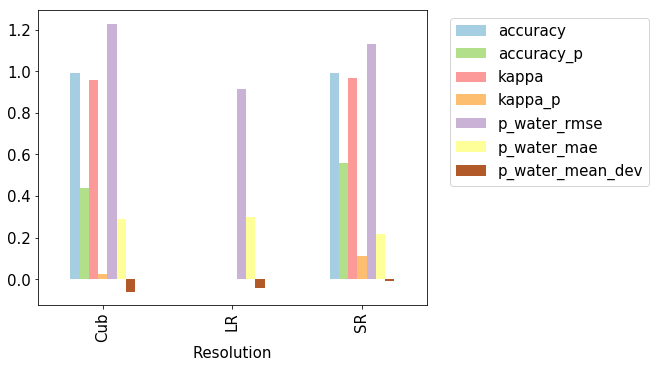

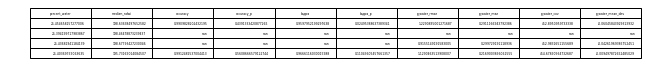

In [22]:
fs=15
fig, ax1 = plt.subplots(figsize=(9,5), constrained_layout=True)
# group1_plot=group1.iloc[[0,1,3]]
group1_plot=group1.copy()
group1_plot.reset_index(level=1,drop=True, inplace=True)
display(group1_plot)
# del group1_plot[2:3]
group1_plot.iloc[[0,2,3]][['accuracy','accuracy_p','kappa','kappa_p','p_water_rmse','p_water_mae','p_water_mean_dev']].plot.bar(ax=ax1, cmap='Paired')
# plt.xticks(range(4),['Cub','HR','LR','SR'], fontsize=fs)
plt.xticks(range(3),['Cub','LR','SR'], fontsize=fs)
plt.yticks(fontsize=fs)
# ax2=ax1.twinx()
# group1['percent_water'].plot.bar(ax=ax2)
# ax1.legend(fontsize=fs, loc='outer right')
ax1.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=fs)
ax1.set_xlabel('Resolution', fontsize=fs)

# savefig
fig.savefig(os.path.join(plots_dir, 'plot_supp1_oa.png'), dpi=300)

# save table
fig2, ax2 = plt.subplots(figsize=(9,1), constrained_layout=True)
ax2.table(cellText=group1_plot.values, colLabels=group1_plot.columns, loc='center', fontsize=fs*2)
ax2.set_axis_off()
fig2.savefig(os.path.join(plots_dir, 'table_supp1_oa.pdf'), bbox_inches='tight', dpi=300)

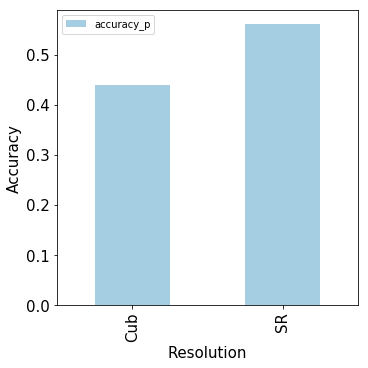

In [26]:
# simple plot
fs=15
fig, ax1 = plt.subplots(figsize=(5,5), constrained_layout=True)
group1_plot.iloc[[0,3]][['accuracy_p']].plot.bar(ax=ax1, cmap='Paired')
# plt.xticks(range(4),['Cub','HR','LR','SR'], fontsize=fs)
plt.xticks(range(2),['Cub','SR'], fontsize=fs)
plt.yticks(fontsize=fs)
# ax2=ax1.twinx()
# group1['percent_water'].plot.bar(ax=ax2)
# ax1.legend(fontsize=fs, loc='outer right')
# ax1.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=fs)
ax1.set_xlabel('Resolution', fontsize=fs)
ax1.set_ylabel('Accuracy', fontsize=fs)

# savefig
fig.savefig(os.path.join(plots_dir, 'plot_1_oa.png'), dpi=300)

In [23]:
?plt.savefig

In [162]:
group1_plot=group1.copy()
group1_plot.reset_index(level=1,drop=True, inplace=True)
# group1_plot.drop_index()
group1_plot.iloc[2,:]
# group1_plot

AttributeError: __delitem__

,,percent_water,median_ndwi,kappa,kappa_p,p_water_rmse,p_water_mae,p_water_cov,p_water_mean_dev
res,thresh,,,,,,,,
Bic,0.0,25.454658,198.636385,0.959795,-0.072545,1.229084,0.291117,452.895096,-0.060458
HR,0.0,25.394200,198.464789,NaN,NaN,NaN,NaN,NaN,NaN
SR,0.0,25.403698,195.731690,0.966612,0.087026,1.129046,0.216900,454.678906,-0.009498


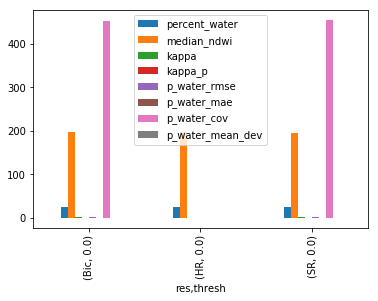

In [127]:
group1_plot.plot.bar()
# group1_plot[['kappa', 'kappa_p']].plot.bar()
group1_plot
# plt.bar(range(3),group1_plot)

# Scratch paper

In [10]:
    # filter out rows with all or no water # uncomment to use # 
print('Ct length before: {}'.format(len(ct)))
print('Number of nearly uniform images: {}'.format(np.sum(np.all((ct.percent_water<2.) | (ct.percent_water>98.), axis=1))))
uniform_mask=np.all((ct.percent_water<2.) | (ct.percent_water>98.), axis=1)
ct.drop(index=(ct[uniform_mask]).index, inplace=True)
# del ct[uniform_mask]
print('Ct length after: {}'.format(len(ct)))

Ct length before: 2130
Number of nearly uniform images: 38
Ct length after: 2092


In [13]:
# filter out nearly uniform imgs, using index modified from ct

(ct[uniform_mask]).index
uniform_mask_dataW=np.isin(dataW.index.get_level_values(2), np.where(uniform_mask))
print('dataW length before: {}'.format(len(dataW)))
dataW.drop(index=(dataW[uniform_mask_dataW]).index, inplace=True)
print('dataW length after: {}'.format(len(dataW)))

dataW length before: 8520
dataW length after: 8368


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# filter out nearly uniform imgs, using index modified from ct (for dataW)

print('data length before: {}'.format(len(data)))
data.drop(index=(data[uniform_mask_dataW]).index, inplace=True)
print('data length after: {}'.format(len(data)))

data length before: 8520
data length after: 8368
